In [3]:
# #import modules
# import os
# import glob
# import pandas as pd
# os.chdir("D:\\CsvToCombine")
# #list all csv files only
# #file_path = "D:\\CsvToCombine"
# #file_list = os.listdir(file_path)
# #file_list
# # csv_files = glob.glob(file_path.format('csv'))
# # csv_files
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# all_filenames

['new_combined_csv.csv',
 'Ped_dir_0_carspeed_2_to_8_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime010120231316.csv',
 'Ped_dir_0_car_speed_12_to_16_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime020120232053.csv',
 'Ped_dir_0_car_speed_16_to_20_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime030120230933.csv',
 'Ped_dir_0_car_speed_8_to_12_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime020120231340.csv',
 'Ped_dir_120_car_speed_14_to_20_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime050120231148.csv',
 'Ped_dir_120_car_speed_2_to_6_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime030120231903.csv',
 'Ped_dir_120_car_speed_6 to_14_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime040120231109.csv',
 'Ped_dir_240_car_speed_2_to_20_ANNDatasetPedXMax5.0-5.0_PedYMax5.0-20.0_Pedvstep0.5-Carvstep2.0_dttime110120231325.csv']

In [18]:
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "new_combined_csv.csv", index=False, encoding='utf-8-sig')

In [1]:
#importing the dataset
import pandas as pd
filepath = 'D:\\CsvToCombine'
dataset = pd.read_csv(filepath +'\\new_combined_csv.csv')
print(dataset.head)
print(dataset.tail)

<bound method NDFrame.head of         CAR X  CAR Y  PED X  PED Y  NORMALIZED PEDESTRIAN POSITION X  \
0         0.0    0.0    0.0    0.0                               0.0   
1         0.0    0.0    0.0    0.5                               0.5   
2         0.0    0.0    0.0    1.0                               1.0   
3         0.0    0.0    0.0    1.5                               1.5   
4         0.0    0.0    0.0    2.0                               2.0   
...       ...    ...    ...    ...                               ...   
298545    0.0    0.0    5.0    3.0                               3.0   
298546    0.0    0.0    5.0    3.5                               3.5   
298547    0.0    0.0    5.0    4.0                               4.0   
298548    0.0    0.0    5.0    4.5                               4.5   
298549    0.0    0.0    5.0    5.0                               5.0   

        NORMALIZED PEDESTRIAN POSITION Y  NORMALIZED PEDESTRIAN DIRECTION  \
0                           

In [56]:
import numpy as np
#Data cleaning
#removing 1st 4 columns to use only normalized values
dataset.drop(columns=dataset.columns[0:4], axis=1,  inplace=True)
dataset.drop('PEDESTRIAN DIRECTION', axis=1,  inplace=True)
dataset.drop('NORMALIZED CAR DIRECTION', axis=1,  inplace=True)
dataset.drop('PEDESTRIAN SPEED', axis=1,  inplace=True)
dataset.drop('CAR SPEED', axis=1,  inplace=True)
#identify duplicate rows
#duplicateRows = dataset[dataset.duplicated()]
dataset = dataset.drop(dataset.index[dataset['TTC'] < 0])
#view duplicate rows
#duplicateRows
dataset.drop_duplicates(inplace=True)
dataset
#dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED,TTC
0,0.0,0.000000e+00,90.000000,0.0,2.0,0.0
1,0.5,3.061617e-17,90.000000,0.0,2.0,0.0
2,1.0,6.123234e-17,90.000000,0.0,2.0,0.0
3,1.5,9.184851e-17,90.000000,0.0,2.0,0.0
4,2.0,1.224647e-16,90.000000,0.0,2.0,0.0
...,...,...,...,...,...,...
99013,3.0,-5.000000e+00,93.141593,5.0,10.0,inf
99014,3.5,-5.000000e+00,93.141593,5.0,10.0,inf
99015,4.0,-5.000000e+00,93.141593,5.0,10.0,inf
99016,4.5,-5.000000e+00,93.141593,5.0,10.0,inf


In [4]:
# duplicateRows = dataset[dataset.duplicated()]

# #view duplicate rows
# duplicateRows
#dataset.drop_duplicates(inplace=True)
#dataset

In [57]:
#Rounding position values to 2 decimal places
dataset['NORMALIZED PEDESTRIAN POSITION Y'] = np.around(dataset['NORMALIZED PEDESTRIAN POSITION Y'].astype(float), decimals= 2)
dataset['NORMALIZED PEDESTRIAN POSITION X'] = np.around(dataset['NORMALIZED PEDESTRIAN POSITION X'].astype(float), decimals= 2)
dataset['NORMALIZED PEDESTRIAN DIRECTION'] = np.around(dataset['NORMALIZED PEDESTRIAN DIRECTION'].astype(float), decimals= 2)
dataset['TTC'] = np.around(dataset['TTC'].astype(float), decimals= 2)
dataset.replace([np.inf, -np.inf], -1, inplace=True)
dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED,TTC
0,0.0,0.0,90.00,0.0,2.0,0.0
1,0.5,0.0,90.00,0.0,2.0,0.0
2,1.0,0.0,90.00,0.0,2.0,0.0
3,1.5,0.0,90.00,0.0,2.0,0.0
4,2.0,0.0,90.00,0.0,2.0,0.0
...,...,...,...,...,...,...
99013,3.0,-5.0,93.14,5.0,10.0,-1.0
99014,3.5,-5.0,93.14,5.0,10.0,-1.0
99015,4.0,-5.0,93.14,5.0,10.0,-1.0
99016,4.5,-5.0,93.14,5.0,10.0,-1.0


In [ ]:
# #Counting the different unique values of TTC
# xx = concatenatedData["TTC"].value_counts().reset_index()
# xx

In [65]:
# # scatter plot of examples by class label
# from collections import Counter
# from sklearn.datasets import make_classification
# from matplotlib import pyplot
# from numpy import where

# counter = Counter('TTC')
# for label, _ in counter.items():
# 	row_ix = where('TTC' == label)[0]
# 	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# pyplot.legend()
# pyplot.show()

In [11]:
# xx = dataset["TTC"].value_counts().reset_index()
zz = dataset["TTC"].nunique()
yy = dataset["TTC"].value_counts()
yy

-1.00    64036
 0.00    13576
 0.12      565
 0.06      502
 0.03      496
         ...  
 5.25        1
 5.05        1
 3.02        1
 2.79        1
 0.39        1
Name: TTC, Length: 174, dtype: int64

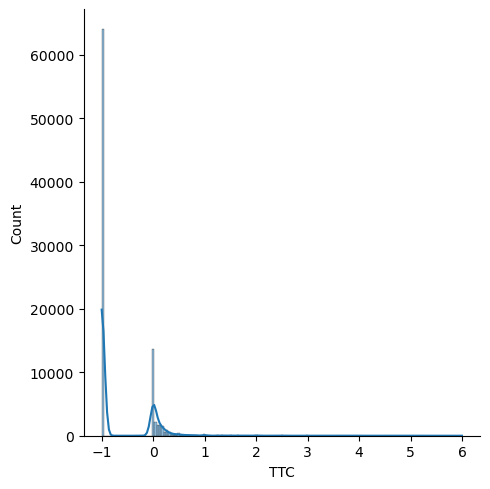

In [60]:
import seaborn as sns
sns.displot(dataset['TTC'], kde = True)

In [12]:
import smogn
cleaned = smogn.smoter(data=dataset.reset_index(), y = "TTC")

r_index: 100%|##########| 1539/1539 [00:01<00:00, 844.20it/s]


In [13]:
print(cleaned)

       index  NORMALIZED PEDESTRIAN POSITION X  \
0         28                          3.096651   
1         30                          4.249815   
2         28                          3.058323   
3         28                          3.421024   
4         31                          4.616998   
...      ...                               ...   
89240  99006                          5.000000   
89243  99009                          1.000000   
89247  99013                          3.000000   
89249  99015                          4.000000   
89250  99016                          4.500000   

       NORMALIZED PEDESTRIAN POSITION Y  NORMALIZED PEDESTRIAN DIRECTION  \
0                                  -1.0                            90.00   
1                                  -1.0                            90.00   
2                                  -1.0                            90.00   
3                                  -1.0                            90.00   
4                  

In [14]:
ss = cleaned["TTC"].nunique()
tt = cleaned["TTC"].value_counts()
tt

-1.000000    30581
 0.000000     6489
 0.375000     2132
 0.750000      980
 0.276786      897
             ...  
 4.050000        1
 5.090000        1
 2.020000        1
 3.050000        1
 0.850000        1
Name: TTC, Length: 834, dtype: int64

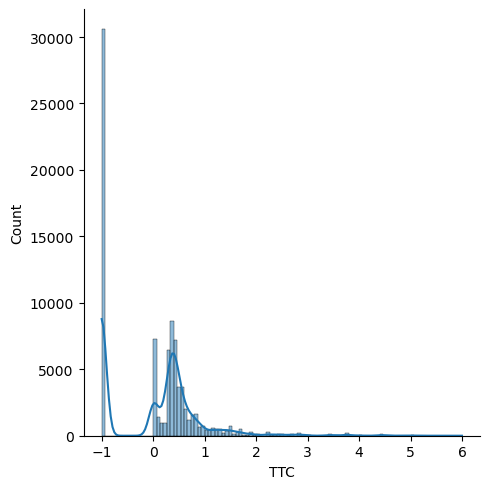

In [17]:
import seaborn as sns
# logData = np.log1p(dataset["TTC"])
# sns.displot(logData, kde = True)
sns.displot(cleaned['TTC'], kde = True)

c:\Users\thiru\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


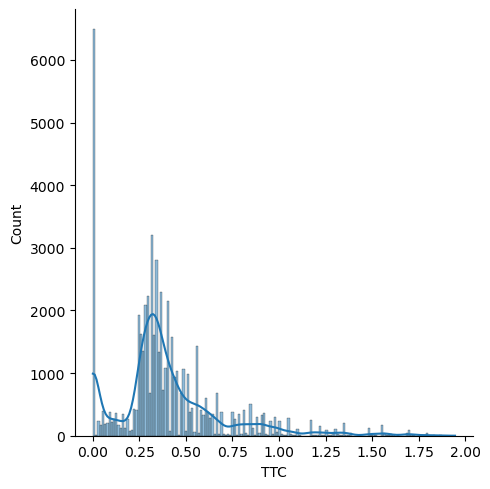

In [16]:
import seaborn as sns
# sns.displot(cleaned['TTC'], kde = True)

logData_cleaned = np.log1p(cleaned["TTC"])
sns.displot(logData_cleaned, kde = True)
#sns.displot(concatenatedData['TTC'], kde = True)
#sns.displot(cleaned['TTC'], kde = True)

In [19]:
# writing cleaned and balanced data to csv
import os
# import glob
# import pandas as pd
os.chdir("D:\\CsvToCombine")
cleaned.to_csv( "cleaned_data_csv.csv", index=False, encoding='utf-8-sig')

In [1]:
import pandas as pd
final_dataset = pd.read_csv('cleaned_data_csv.csv')
final_dataset.drop('index', axis=1,  inplace=True)
final_dataset

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED,TTC
0,3.096651,-1.0,90.00,0.0,2.0,0.333333
1,4.249815,-1.0,90.00,0.0,2.0,0.416667
2,3.058323,-1.0,90.00,0.0,2.0,0.375000
3,3.421024,-1.0,90.00,0.0,2.0,0.375000
4,4.616998,-1.0,90.00,0.0,2.0,0.416667
...,...,...,...,...,...,...
85330,5.000000,-4.5,93.14,5.0,10.0,-1.000000
85331,1.000000,-5.0,93.14,5.0,10.0,-1.000000
85332,3.000000,-5.0,93.14,5.0,10.0,-1.000000
85333,4.000000,-5.0,93.14,5.0,10.0,-1.000000


In [3]:
import tensorflow as tf
#Visualizng how the TTC is distributed
#logData = np.log1p(concatenatedData["TTC"])
#sns.displot(logData, kde = True)
#sns.displot(concatenatedData['TTC'], kde = True)
#sns.displot(cleaned['TTC'], kde = True)
print(tf.__version__)

2.10.0


In [4]:
# Train-Test split

train_dataset = final_dataset.sample(frac = 0.8, random_state=0)
test_dataset = final_dataset.drop(train_dataset.index)

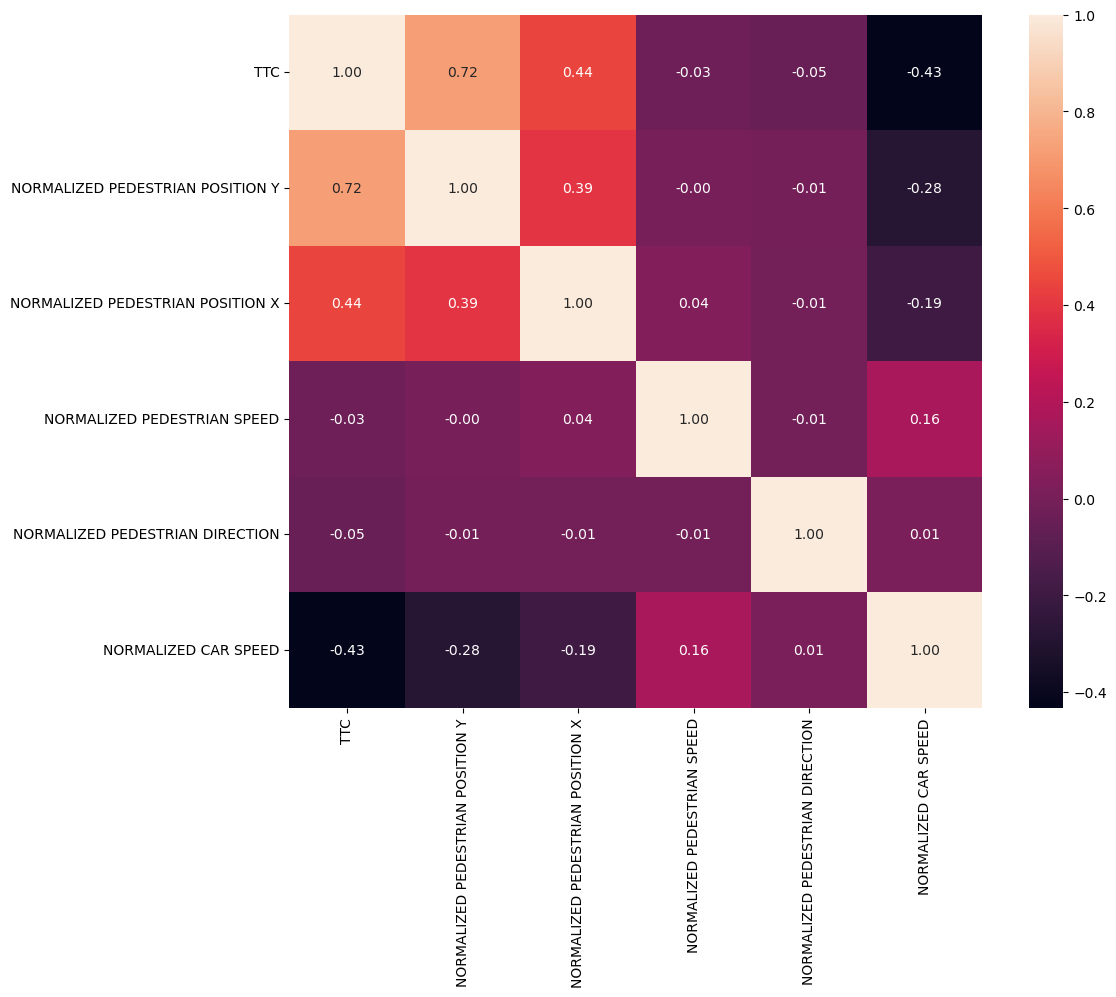

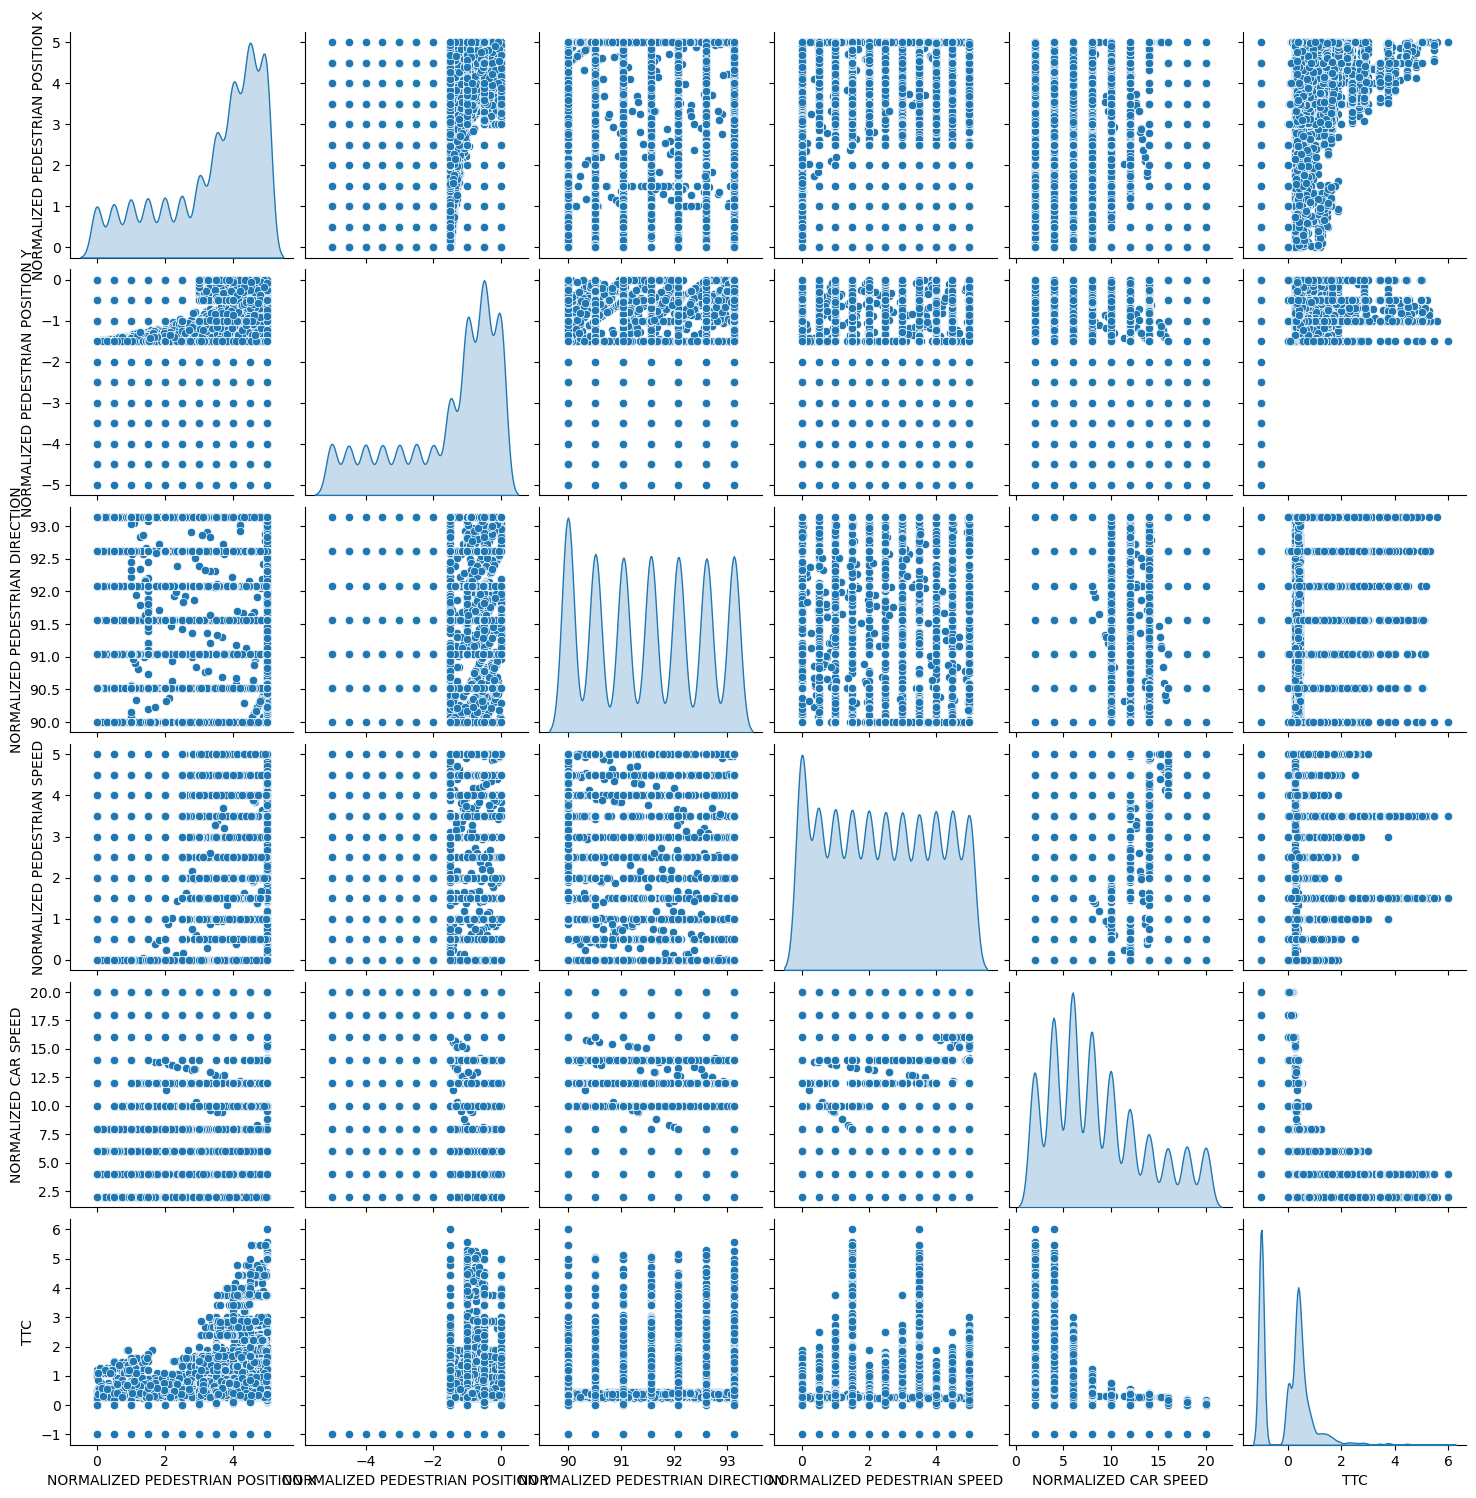

In [5]:
#Correlation matrix and pairplot of the dataset columns

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = train_dataset.corr()
plt.subplots(figsize=(12,9))
k=10
cols = corr_matrix.nlargest(k,'TTC')['TTC'].index
cm = np.corrcoef(train_dataset[cols].values.T)
#sns.heatmap(corr_matrix, vmax=0.9, square=True)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Plotting the dataset columns to find patterns

sns.pairplot(train_dataset, diag_kind='kde')

In [6]:
#viewing summary such as mean std of the train data
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#dataset["TTC"] = np.log1p(dataset["TTC"])
#train_stats = train_dataset.pop('TTC')

train_dataset.describe().transpose()[['mean', 'std']]
# Normalizer = tf.keras.layers.Normalization(axis=-1)
# Normalizer.adapt(np.array(cleaned))
# print(cleaned)

,mean,std
NORMALIZED PEDESTRIAN POSITION X,3.383516,1.475899
NORMALIZED PEDESTRIAN POSITION Y,-1.591244,1.521369
NORMALIZED PEDESTRIAN DIRECTION,91.519794,1.064595
NORMALIZED PEDESTRIAN SPEED,2.407048,1.618683
NORMALIZED CAR SPEED,8.753676,5.100841
TTC,0.001459,0.895526


In [7]:
#Splitting the target variable labels from the data

train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('TTC')
test_labels = test_features.pop('TTC')

In [8]:
#just to check if TTC column has been removed
test_features

,NORMALIZED PEDESTRIAN POSITION X,NORMALIZED PEDESTRIAN POSITION Y,NORMALIZED PEDESTRIAN DIRECTION,NORMALIZED PEDESTRIAN SPEED,NORMALIZED CAR SPEED
2,3.058323,-1.000000,90.00,0.0,2.0
10,3.281570,-0.500000,90.00,0.0,2.0
13,4.584196,-0.500000,90.00,0.0,2.0
20,4.310329,-1.000000,91.05,4.0,10.0
21,4.568131,-0.715934,91.05,4.0,10.0
...,...,...,...,...,...
85299,5.000000,-2.000000,93.14,5.0,10.0
85306,4.500000,-2.500000,93.14,5.0,10.0
85311,0.000000,-3.500000,93.14,5.0,10.0
85313,1.000000,-3.500000,93.14,5.0,10.0


In [33]:
# #Data normalization

# def norm(x):
#     return ((x-train_stats['mean'])/train_stats['std'])
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)

In [9]:
# Linear model
import tensorflow as tf
import keras
from keras import layers

normalizer_layer = keras.layers.Normalization(axis=-1)
#normalizer_layer = layers.Normalization(input_shape=[len(train_features)], axis=None)
normalizer_layer = layers.Normalization(input_shape=[5,], axis=None)
normalizer_layer.adapt(np.array(train_features))
#print('Normalized:', normalizer(train_features).numpy())
# def build_model():
model = keras.Sequential([
        normalizer_layer,
        layers.Dense(units=1)
    ])
model.summary()

    # optimizer = tf.keras.optimizers.RMSprop(0.001)  

    # model.compile(loss='mse',
    #               optimizer=optimizer,
    #               metrics=['mae','mse'])
    # return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 5)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 9
Trainable params: 6
Non-trainable params: 3
_________________________________________________________________


In [10]:
model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(5, 1) dtype=float32, numpy=
array([[-0.9345517 ],
       [-0.5484898 ],
       [ 0.18926978],
       [ 0.1236105 ],
       [-0.5692129 ]], dtype=float32)>

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error', metrics=['mae', 'mse'])

In [14]:
# Report for training data for linear model
#%%time
history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
1707/1707 [==============================] - 12s 6ms/step - loss: 0.7212 - mae: 0.7212 - mse: 0.9514 - val_loss: 0.6486 - val_mae: 0.6486 - val_mse: 0.8110
Epoch 2/100
1707/1707 [==============================] - 10s 6ms/step - loss: 0.6404 - mae: 0.6404 - mse: 0.7769 - val_loss: 0.6151 - val_mae: 0.6151 - val_mse: 0.7368
Epoch 3/100
1707/1707 [==============================] - 8s 5ms/step - loss: 0.6111 - mae: 0.6111 - mse: 0.7068 - val_loss: 0.5921 - val_mae: 0.5921 - val_mse: 0.6672
Epoch 4/100
1707/1707 [==============================] - 8s 5ms/step - loss: 0.5877 - mae: 0.5877 - mse: 0.6526 - val_loss: 0.5718 - val_mae: 0.5718 - val_mse: 0.6357
Epoch 5/100
1707/1707 [==============================] - 7s 4ms/step - loss: 0.5671 - mae: 0.5671 - mse: 0.6141 - val_loss: 0.5541 - val_mae: 0.5541 - val_mse: 0.6090
Epoch 6/100
1707/1707 [==============================] - 9s 5ms/step - loss: 0.5503 - mae: 0.5503 - mse: 0.5929 - val_loss: 0.5422 - val_mae: 0.5422 - val_mse: 0.5

In [15]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [TTC]')
  plt.legend()
  plt.grid(True)

In [16]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


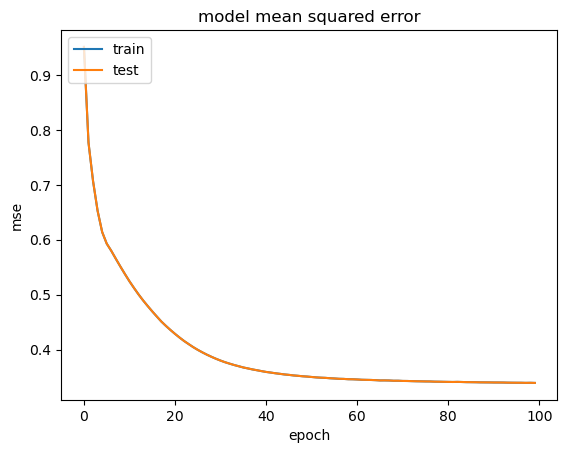

In [18]:
# summarize history for mse
plt.plot(history.history['mse'])
plt.plot(history.history['mse'])
plt.title('model mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

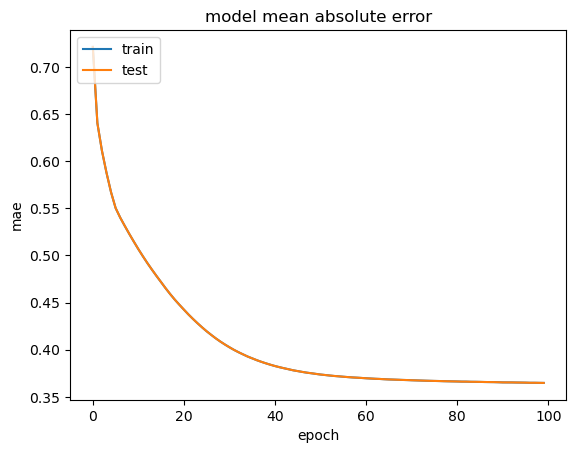

In [23]:
plt.plot(history.history['mae'])
plt.plot(history.history['mae'])
plt.title('model mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

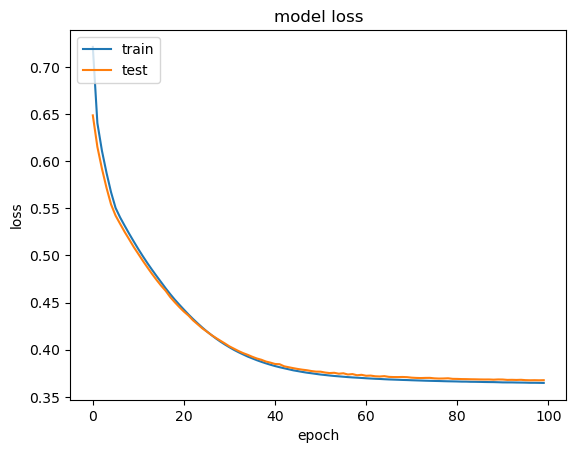

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.464164,0.400067,95
96,0.451681,0.435603,96
97,0.471264,0.566936,97
98,0.459185,0.457740,98
99,0.473912,0.372494,99


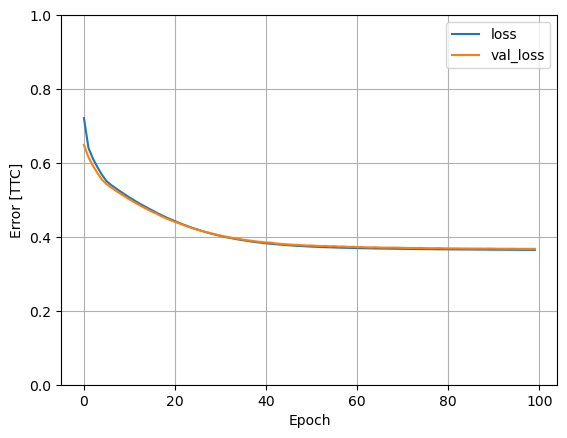

In [20]:
plot_loss(history)

In [24]:
print(test_labels[:10])
model.predict(test_features[:10])

2     0.375000
10    0.333333
13    0.416667
20    0.313433
21    0.313433
27    0.284483
30    0.416667
43    0.375000
46    0.276786
55    0.375000
Name: TTC, dtype: float64
1/1 [==============================] - 0s 62ms/step


array([[0.25686073],
       [0.43052936],
       [0.5637176 ],
       [0.19035101],
       [0.3024087 ],
       [0.32724333],
       [0.5598936 ],
       [0.39450002],
       [0.5121405 ],
       [0.68263507]], dtype=float32)

In [25]:
# Report for training data for linear model with normalized features
#%%time
history = model.fit(
    train_features,
    train_labels,
    epochs=150,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/150
1707/1707 [==============================] - 12s 7ms/step - loss: 0.3647 - mae: 0.3647 - mse: 0.3391 - val_loss: 0.3675 - val_mae: 0.3675 - val_mse: 0.3497
Epoch 2/150
1707/1707 [==============================] - 11s 6ms/step - loss: 0.3646 - mae: 0.3646 - mse: 0.3389 - val_loss: 0.3674 - val_mae: 0.3674 - val_mse: 0.3496
Epoch 3/150
1707/1707 [==============================] - 12s 7ms/step - loss: 0.3646 - mae: 0.3646 - mse: 0.3390 - val_loss: 0.3673 - val_mae: 0.3673 - val_mse: 0.3475
Epoch 4/150
1707/1707 [==============================] - 11s 6ms/step - loss: 0.3645 - mae: 0.3645 - mse: 0.3389 - val_loss: 0.3671 - val_mae: 0.3671 - val_mse: 0.3478
Epoch 5/150
1707/1707 [==============================] - 12s 7ms/step - loss: 0.3645 - mae: 0.3645 - mse: 0.3389 - val_loss: 0.3670 - val_mae: 0.3670 - val_mse: 0.3481
Epoch 6/150
1707/1707 [==============================] - 12s 7ms/step - loss: 0.3644 - mae: 0.3644 - mse: 0.3387 - val_loss: 0.3671 - val_mae: 0.3671 - val_mse:

In [26]:
normalized_test_features = np.array(test_features)
#normalized_test_labels = np.array(test_labels)
print(normalizer_layer(normalized_test_features).numpy())
#print(normalizer_layer(normalized_test_labels).numpy())

[[-0.5015386  -0.6156551   1.9431862  -0.587536   -0.5312977 ]
 [-0.49526104 -0.6015955   1.9431862  -0.587536   -0.5312977 ]
 [-0.45863235 -0.6015955   1.9431862  -0.587536   -0.5312977 ]
 ...
 [-0.587536   -0.6859529   2.0314803  -0.4469403  -0.30634463]
 [-0.55941683 -0.6859529   2.0314803  -0.4469403  -0.30634463]
 [-0.4469403  -0.6859529   2.0314803  -0.4469403  -0.30634463]]


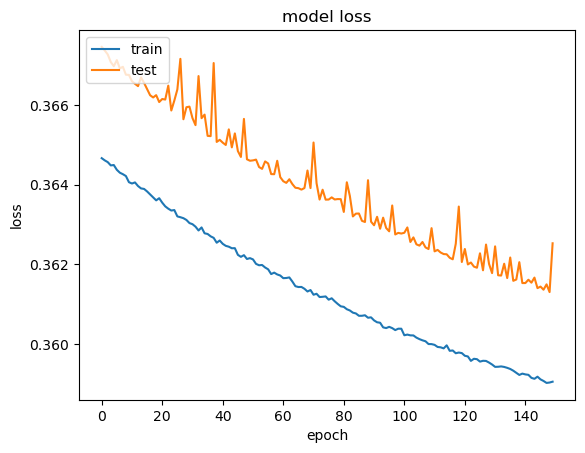

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
print(test_labels[:10])
model.predict(test_features[:10])

2     0.375000
10    0.333333
13    0.416667
20    0.313433
21    0.313433
27    0.284483
30    0.416667
43    0.375000
46    0.276786
55    0.375000
Name: TTC, dtype: float64
1/1 [==============================] - 0s 27ms/step


array([[0.31604958],
       [0.4928999 ],
       [0.623765  ],
       [0.22530413],
       [0.33893538],
       [0.36499453],
       [0.5616045 ],
       [0.36901236],
       [0.48837233],
       [0.700346  ]], dtype=float32)

In [27]:
test_results = {}
test_results['linear_model'] = model.evaluate(
   test_features, test_labels, verbose=1)

534/534 [==============================] - 1s 1ms/step - loss: 0.3637 - mae: 0.3637 - mse: 0.3483


In [ ]:
# test_results = {}
# normalized_test_features = np.array(test_features)
# normalized_test_labels = np.array(test_labels)
# test_results['linear_model'] = model.evaluate(
#     normalizer_layer(normalized_test_features).numpy(), normalizer_layer(test_labels).numpy().transpose(), verbose=1)

In [33]:
print(test_results['linear_model'])

2.8207995891571045


In [34]:
print(train_features[:10], normalizer_layer(test_labels).numpy()[:10])
model.predict(train_features[:10])

       NORMALIZED PEDESTRIAN POSITION X  NORMALIZED PEDESTRIAN POSITION Y  \
59460                          3.000000                          0.000000   
4504                           5.000000                         -1.343925   
23504                          4.702201                         -1.500000   
56510                          1.500000                          0.000000   
81815                          4.000000                         -4.500000   
40071                          3.276912                         -1.500000   
31088                          3.824845                         -0.500000   
47856                          4.500000                          0.000000   
82136                          0.000000                         -1.500000   
6043                           5.000000                         -0.788163   

       NORMALIZED PEDESTRIAN DIRECTION  NORMALIZED PEDESTRIAN SPEED  \
59460                        90.520000                          4.0   
4504      

array([[ 0.3261528 ],
       [ 0.10991859],
       [ 0.19106579],
       [ 0.09083557],
       [-0.9403839 ],
       [ 0.1432352 ],
       [ 0.46573925],
       [ 0.7250366 ],
       [-0.39893436],
       [ 0.26664448]], dtype=float32)

In [ ]:
#DNN non-linear #########################################################

In [44]:
def build_and_compile_model(normalizer_layer):
  nn_model = keras.Sequential([
      normalizer_layer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      #layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  nn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError()])
  return nn_model

In [45]:
dnn_model = build_and_compile_model(normalizer_layer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 5)                3         
 ion)                                                            
                                                                 
 dense_17 (Dense)            (None, 64)                384       
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 8,836
Trainable params: 8,833
Non-trainable params: 3
_________________________________________________________________


In [46]:
# %%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
1707/1707 [==============================] - 5s 3ms/step - loss: 0.4297 - mean_absolute_error: 0.4297 - mean_squared_error: 0.4257 - val_loss: 0.3692 - val_mean_absolute_error: 0.3692 - val_mean_squared_error: 0.3643
Epoch 2/100
1707/1707 [==============================] - 5s 3ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_squared_error: 0.2938 - val_loss: 0.3109 - val_mean_absolute_error: 0.3109 - val_mean_squared_error: 0.2841
Epoch 3/100
1707/1707 [==============================] - 5s 3ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_squared_error: 0.2697 - val_loss: 0.2709 - val_mean_absolute_error: 0.2709 - val_mean_squared_error: 0.2879
Epoch 4/100
1707/1707 [==============================] - 7s 4ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_squared_error: 0.2504 - val_loss: 0.2404 - val_mean_absolute_error: 0.2404 - val_mean_squared_error: 0.2554
Epoch 5/100
1707/1707 [==============================] - 7s 4ms/step - loss: 0.2259 

In [ ]:
# loss, acc = dnn_model.evaluate(test_features, test_labels, verbose=2)
# print("DNN model accuracy: {:5.2f}%".format(100 * mae))

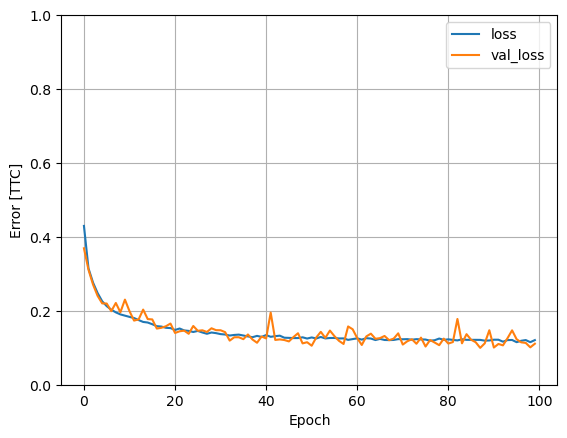

In [47]:
plot_loss(history)

534/534 [==============================] - 1s 2ms/step


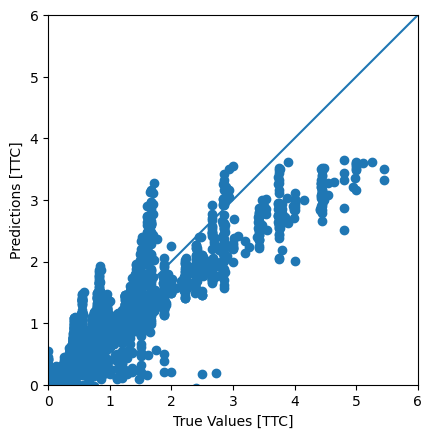

In [48]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [TTC]')
plt.ylabel('Predictions [TTC]')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

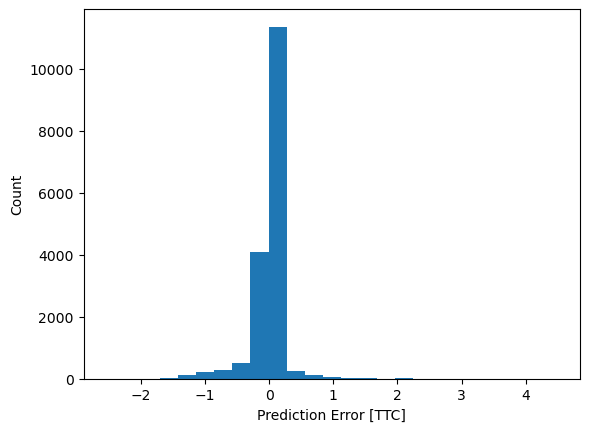

In [49]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [TTC]')
_ = plt.ylabel('Count')

In [50]:
print(test_labels[:10])
dnn_model.predict(test_features[:10])

2     0.375000
10    0.333333
13    0.416667
20    0.313433
21    0.313433
27    0.284483
30    0.416667
43    0.375000
46    0.276786
55    0.375000
Name: TTC, dtype: float64
1/1 [==============================] - 0s 25ms/step


array([[0.45938784],
       [0.43920046],
       [0.79670674],
       [0.35220176],
       [0.3672455 ],
       [0.35653585],
       [0.65733117],
       [0.32678688],
       [0.3490392 ],
       [0.466173  ]], dtype=float32)

In [ ]:
#Hyperparameter tuning###########################
##################################################

In [ ]:
# splitting into training and test set
# import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# #dataset["TTC"] = np.log1p(dataset["TTC"])
# Normalizer = tf.keras.layers.Normalization(axis=-1)
# Normalizer.adapt(np.array(cleaned))
# print(cleaned)
# labels = normalizedData.pop('TTC')
# train_dataset = normalizedData.sample(frac=0.8, random_state=0)
# test_dataset = normalizedData.drop(train_dataset.index)

# train_features = train_dataset.copy()
# test_features = test_dataset.copy()

# train_labels = train_features.pop('TTC')
# test_labels = test_features.pop('TTC')

# #Normalizing the feature values

# # testNormalizer = tf.keras.layers.Normalization(axis=-1)

# # testNormalizer.adapt(np.array(test_features))

# first = np.array(normalizedData[:1])

# with np.printoptions(precision=2, suppress=True):
#   print('First example:', first)
#   print()
#   print('Normalized:', Normalizer(first).numpy())
# Normalizer

In [70]:
#Creating the Neural network model

# linear_model = tf.keras.Sequential([
#     trainNormalizer,
#     layers.Dense(units=1, activation = 'relu'),
#     layers.Dense(units=1, activation = 'relu')
# ])

In [102]:

# hidden_units1 = 160
# hidden_units2 = 480
# hidden_units3 = 256
# learning_rate = 0.01
# model = tf.keras.Sequential([
#     layers.Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
#     layers.Dense(1, kernel_initializer='normal', activation='linear')
#   ])

In [ ]:
#################################################################################################################################################################################
#  Old code 
###############################################################################################################################################################################

In [155]:
hidden_units1 = 160
hidden_units2 = 480
model = tf.keras.Sequential([
    layers.Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    layers.Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    layers.Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [156]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error',
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [160]:
history = model.fit(
    train_features,
    train_labels,
    epochs=20,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

history.history

print("Evaluate model on test data")
results = model.evaluate(test_features, test_labels, batch_size=128)
print("test loss, test acc:", results)


Epoch 1/20
319/319 [==============================] - 3s 8ms/step - loss: 1.1907 - sparse_categorical_accuracy: 0.0339 - val_loss: 0.8959 - val_sparse_categorical_accuracy: 0.0357
Epoch 2/20
319/319 [==============================] - 2s 6ms/step - loss: 1.1463 - sparse_categorical_accuracy: 0.0339 - val_loss: 0.5421 - val_sparse_categorical_accuracy: 0.0357
Epoch 3/20
319/319 [==============================] - 2s 6ms/step - loss: 0.8781 - sparse_categorical_accuracy: 0.0339 - val_loss: 0.7975 - val_sparse_categorical_accuracy: 0.0357
Epoch 4/20
319/319 [==============================] - 2s 7ms/step - loss: 0.7694 - sparse_categorical_accuracy: 0.0339 - val_loss: 0.6792 - val_sparse_categorical_accuracy: 0.0357
Epoch 5/20
319/319 [==============================] - 2s 7ms/step - loss: 0.7090 - sparse_categorical_accuracy: 0.0339 - val_loss: 0.3575 - val_sparse_categorical_accuracy: 0.0357
Epoch 6/20
319/319 [==============================] - 2s 7ms/step - loss: 0.6152 - sparse_categorica

In [158]:
prediction = model.predict(test_features)
#prediction = model.predict(x_test[:1])
print("prediction shape:", prediction.shape)
prediction

58/58 [==============================] - 0s 1ms/step
prediction shape: (1827, 1)


array([[ 3.5121121],
       [ 3.7772603],
       [ 5.456351 ],
       ...,
       [-1.9884009],
       [-1.0284667],
       [-1.1376204]], dtype=float32)

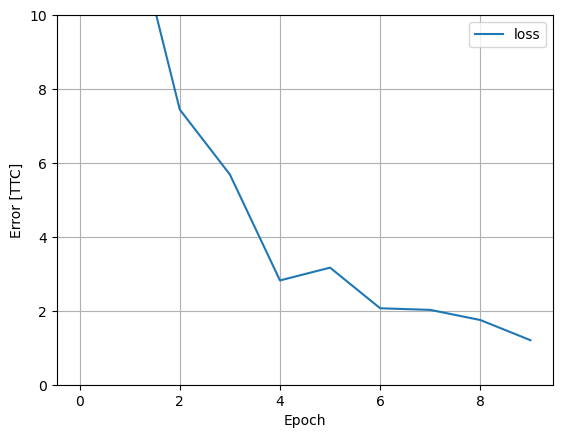

In [159]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  #plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [TTC]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [ ]:
# #Visualising the Actual and predicted Result
# plt.plot(test_labels, color = 'green', label = 'Actual')
# plt.plot(prediction, color = 'blue', label = 'Predicted')
# plt.grid(alpha = 0.3)
# plt.xlabel('Number')
# plt.ylabel('TTC')
# plt.title('Actual vs Predicted')
# plt.legend()
# plt.show()

Text(0, 0.5, 'predictions')

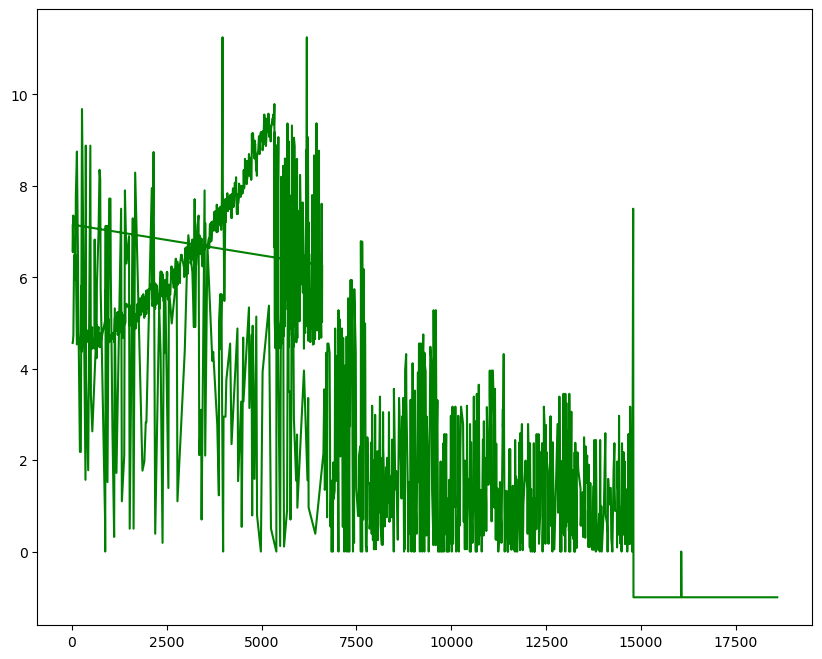

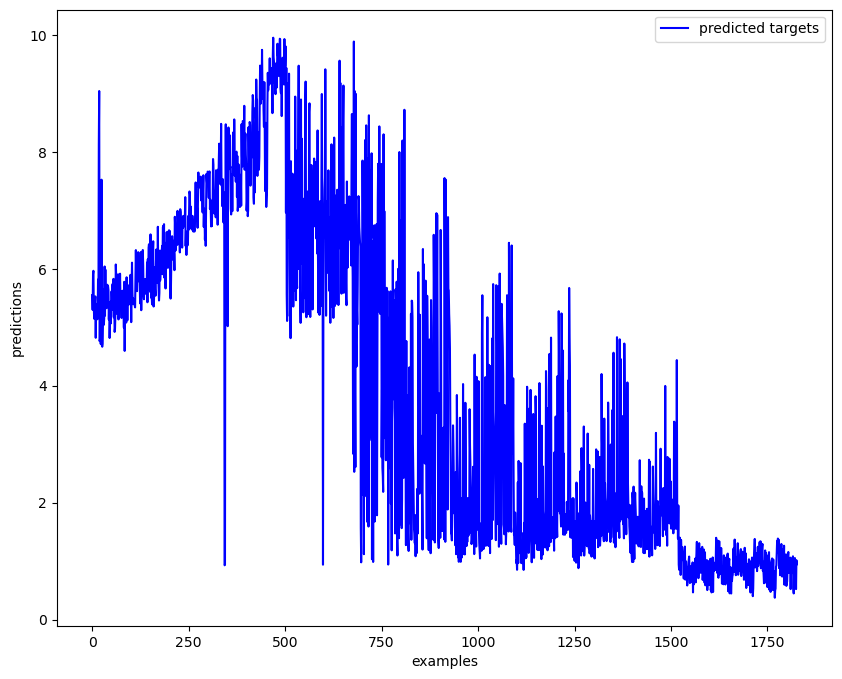

In [126]:
plt.figure(figsize=(10,8))
plt.plot(test_labels, color = 'green', label="original targets")
plt.figure(figsize=(10,8))
plt.plot(prediction, color = 'blue', label="predicted targets")
plt.legend()
plt.xlabel('examples')
plt.ylabel('predictions')
#denormalizeLayer = tf.keras.layers.Normalization(axis=-1, invert=True)
#denormalizeLayer.adapt(np.array(prediction))


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.python.keras import layers
from scipy import stats
import math

#importing the dataset
dataset1 = pd.read_csv('C:\\Users\\thiru\\Desktop\\ANN05_11_Dataset_With17k rows\\ANNDatasetPedV0.0-5.5_CarV2.0-20.0_pt0-3000_202211041224.csv')

#removing 1st 4 columns to use only normalized values
dataset1.drop(columns=dataset1.columns[0:4], axis=1,  inplace=True)
#dataset.drop(columns=dataset.columns[-1], axis=1,  inplace=True)

#Rounding position values to 2 decimal places
dataset1['NORMALIZED PEDESTRIAN POSITION Y'] = np.around(dataset1['NORMALIZED PEDESTRIAN POSITION Y'].astype(float), decimals= 2)
dataset1['NORMALIZED PEDESTRIAN POSITION X'] = np.around(dataset1['NORMALIZED PEDESTRIAN POSITION X'].astype(float), decimals= 2)
dataset1['TTC'] = np.around(dataset1['TTC'].astype(float), decimals= 2)
dataset1.drop(dataset1.loc[dataset1['TTC']>10].index, inplace=True)
#dataset1.drop(dataset1.loc[dataset1['TTC'].equals(math.isinf())].index, inplace=True)
dataset1.drop(dataset1.loc[dataset1['TTC']<0].index, inplace=True)
dataset1.replace([np.inf, -np.inf], -1, inplace=True)
#Removing duplicates from the dataset
dataset1.drop_duplicates(inplace=True)
dataset1

dataset2 = pd.read_csv('C:\\Users\\thiru\\Desktop\\FinalDatasetsForNeuralNetwork\\ANNDatasetPedXMax25.0-5.5_PedYMax25.0-20.0_Pedvstep0.1-Carvstep0.2_dttime271120221819.csv')
dataset2.drop(columns=dataset2.columns[0:4], axis=1,  inplace=True)
dataset2.drop(columns=dataset2.columns[2], axis=1,  inplace=True)
dataset2.drop(columns=dataset2.columns[3], axis=1,  inplace=True)
dataset2.drop(columns=dataset2.columns[3], axis=1,  inplace=True)
dataset2.drop(columns=dataset2.columns[4], axis=1,  inplace=True)
#dataset2.drop(columns=dataset2.columns[2,4,5,7], axis=1,  inplace=True)
#dataset2.drop(columns=dataset2.columns[2,4,5,7], axis=1,  inplace=True)

dataset2['NORMALIZED PEDESTRIAN POSITION Y'] = np.around(dataset2['NORMALIZED PEDESTRIAN POSITION Y'].astype(float), decimals= 2)
dataset2['NORMALIZED PEDESTRIAN POSITION X'] = np.around(dataset2['NORMALIZED PEDESTRIAN POSITION X'].astype(float), decimals= 2)
dataset2.replace([np.inf, -np.inf], -1, inplace=True)
dataset2['TTC'] = np.around(dataset2['TTC'].astype(float), decimals= 2)
concatenatedData = pd.concat([dataset1, dataset2],ignore_index= True)
concatenatedData.drop_duplicates(inplace=True)
concatenatedData